# Competitor's Moving Average Normalized
## Description
For the target company we take the average stock price of similar companies during any number of days and normalize the time series. The difference between the target company and the CMAN will tell us if it's overpriced relatively to its competitors.

In [153]:
from openbb_terminal.sdk import openbb as obb
import yfinance as yf

In [154]:
#Inputs
target="GM"
days=30
#Choose from Finviz or Polygon
source="Finnhub"

In [155]:
#Creates a list of similar stocks relatively to the targer
similar = obb.stocks.ca.similar(target, source)

print(similar)

['TSLA', 'F', 'GM', 'RIVN', 'LCID', 'THO', 'NWTN', 'WGO', 'FSR', 'FFIE']


In [156]:
##Polish the data

#Delete empty tickers

#Polygon does not add the target's ticker
if source=="Polygon":
    similar.append(target)

#Create a list with each ticker's trading date.
for i in range(len(similar)):
    dates.append(yf.Ticker(similar[i]).history(period="max").index[0].date())

#Sort it
dates.sort()

In [157]:
#Build a dataframe with the similar stocks, one year time-frame.
hist = obb.stocks.ca.hist(similar, dates[-1])

#Normalize it
hist = (hist-hist.min())/(hist.max()-hist.min())

#Add a column with the (target) competitor's average over the specified (date) timme frame
if (days>1):
    hist["CMAN"]=(hist.drop(target, axis=1).mean(axis=1).rolling(window=days).mean())

#Add a same days moving average for reference
hist["MA"]=(hist[target].rolling(window=days).mean())

<Axes: xlabel='Date'>

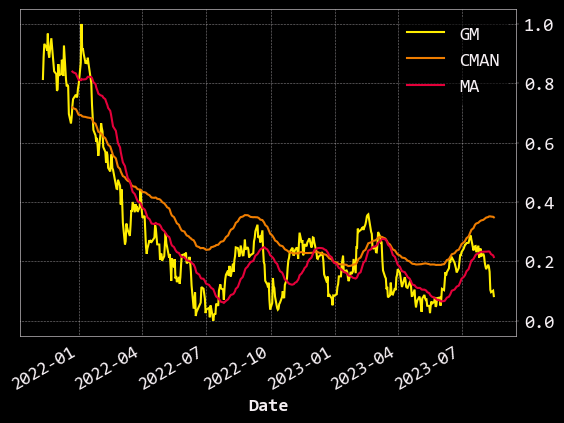

In [158]:
graph=hist[[target,"CMAN","MA"]]
graph.plot(kind='line')